###### https://www.quantopian.com/lectures

In [60]:
%matplotlib inline

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [62]:
np.random.seed(123)
normal=np.random.randn(500)
print np.mean(normal[:10])
print np.mean(normal)

-0.269516110326
-0.0386439735132


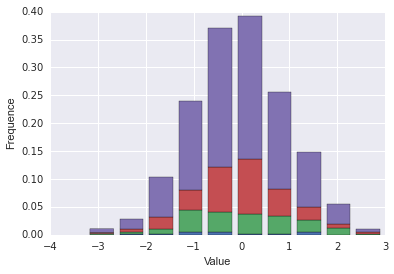

In [63]:
plt.hist([normal[:10],normal[10:100],normal[100:250],normal],normed=1,histtype='bar',stacked=True)
plt.xlabel('Value')
plt.ylabel('Frequence')

In [64]:
%connect_info

{
  "stdin_port": 53284, 
  "ip": "127.0.0.1", 
  "control_port": 53285, 
  "hb_port": 53286, 
  "signature_scheme": "hmac-sha256", 
  "key": "c05e033a-a830-48d6-8b89-fbc590c9fe28", 
  "shell_port": 53282, 
  "transport": "tcp", 
  "iopub_port": 53283
}

Paste the above JSON into a file, and connect with:
    $> ipython <app> --existing <file>
or, if you are local, you can connect with just:
    $> ipython <app> --existing kernel-694739c9-74c0-40f3-ac3f-1750071cfeb0.json 
or even just:
    $> ipython <app> --existing 
if this is the most recent IPython session you have started.


In [65]:
ls -l

 驱动器 C 中的卷没有标签。
 卷的序列号是 2848-F691

 C:\Anaconda\zht_ipython 的目录



找不到文件


In [66]:
pwd

u'C:\\Anaconda\\zht_ipython'

mean: 0.00984758128215
standard deviation: 5.06070874011


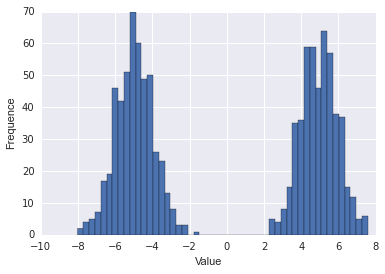

In [67]:
def bimodal(n):
    X=np.zeros((n))
    for i in range(n):
        if np.random.binomial(1,0.5)==0:
            X[i]=np.random.normal(-5,1)
        else:
            X[i]=np.random.normal(5,1)
    return X
X=bimodal(1000)

plt.hist(X,bins=50)
plt.ylabel('Frequence')
plt.xlabel('Value')
print 'mean:',np.mean(X)
print 'standard deviation:',np.std(X)

# long-short equity strategies

In [68]:
#long-short equity strategies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
current_factor_values=np.random.normal(0,1,10000)
equity_names=['equity'+str(i) for i in range(10000)]
factor_data=pd.Series(current_factor_values,index=equity_names)
factor_data=pd.DataFrame(factor_data,columns=['Factor Value'])
factor_data.head(10)

,Factor Value
equity0,0.395589
equity1,-0.780909
equity2,-0.164671
equity3,0.774326
equity4,-0.246828
equity5,-0.365342
equity6,2.184314
equity7,0.316195
equity8,0.733307
equity9,0.746238


In [70]:
future_returns=current_factor_values+np.random.normal(0,1,10000)
return_data=pd.Series(future_returns,index=equity_names)
return_data=pd.DataFrame(return_data,columns=['Returns'])
data=return_data.join(factor_data)
data.head(10)

,Returns,Factor Value
equity0,-0.193896,0.395589
equity1,-3.649948,-0.780909
equity2,0.423141,-0.164671
equity3,1.303793,0.774326
equity4,-0.078802,-0.246828
equity5,-0.732721,-0.365342
equity6,1.412162,2.184314
equity7,1.615966,0.316195
equity8,1.416084,0.733307
equity9,0.524703,0.746238


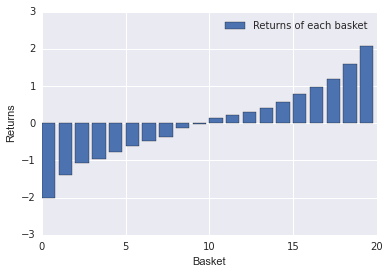

In [71]:
ranked_data=data.sort('Factor Value')
number_of_baskets=10000/500
basket_returns=np.zeros(number_of_baskets)
for i in range(number_of_baskets):
    start=i*500
    end=i*500+500
    basket_returns[i]=ranked_data[start:end]['Returns'].mean()
plt.bar(range(number_of_baskets),basket_returns)
plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of each basket'])

In [72]:
basket_returns[-1]-basket_returns[0]

4.0764794465413061

# researching a pairs trading strategy

In [73]:
import numpy as np
import pandas as pd
import statsmodels
from statsmodels.tsa.stattools import coint
np.random.seed(103)
import matplotlib.pyplot as plt
%matplotlib inline

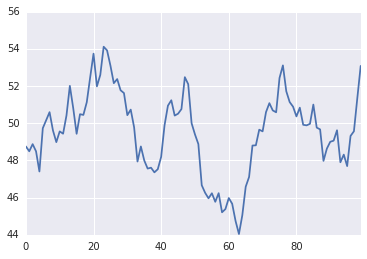

In [74]:
X_returns=np.random.normal(0,1,100)
X=pd.Series(np.cumsum(X_returns),name='X')+50
X.plot()

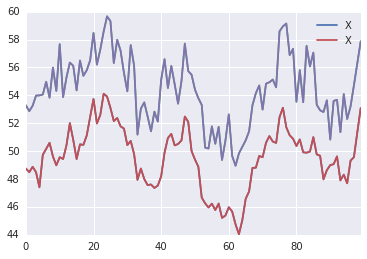

In [75]:
some_noise=np.random.normal(0,1,100)
Y=X+5+some_noise
pd.concat([X,Y],axis=1).plot()

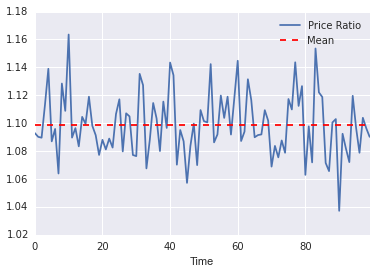

In [76]:
(Y/X).plot()
plt.axhline((Y/X).mean(),color='red',linestyle='--')
plt.xlabel('Time')
plt.legend(['Price Ratio','Mean'])

   ##test for Cointegration
that's an intuitive definition,but how do we test fo rthis statistically?

In [77]:
score,pvalue,_=coint(X,Y)
print pvalue

5.28962865122e-11


In [78]:
X.corr(Y)

0.89663354746310531

###corrlation without cointegration

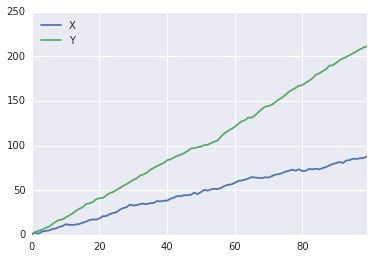

In [79]:
X_returns=np.random.normal(1,1,100)
Y_returns=np.random.normal(2,1,100)


X_diverging=pd.DataFrame(np.cumsum(X_returns),columns=['X'])
Y_diverging=pd.DataFrame(np.cumsum(Y_returns),columns=['Y'])

pd.concat([X_diverging,Y_diverging],axis=1).plot()

(0, 40)

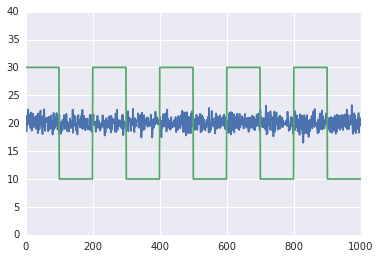

In [80]:
Y2=pd.Series(np.random.normal(0,1,1000),name='Y2')+20
Y3=Y2.copy()
Y3[0:100]=30
Y3[100:200]=10
Y3[200:300]=30
Y3[300:400]=10
Y3[400:500]=30
Y3[500:600]=10
Y3[600:700]=30
Y3[700:800]=10
Y3[800:900]=30
Y3[900:1000]=10
Y2.plot()
Y3.plot()
plt.ylim([0,40])

In [81]:
#correlation is nearly zero
print 'correlation:'+str(Y2.corr(Y3))
score,pvalue,_=coint(Y2,Y3)
print 'cointegration test p-values:',pvalue

correlation:-0.0238725135993
cointegration test p-values: 0.0


##regression analysis

In [82]:
import numpy as np
from statsmodels import regression,stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy as sp

def linreg(X,Y):
    x=sm.add_constant(X)
    model=regression.linear_model.OLS(Y,x).fit()
    return model.params[0],model.params[1]

In [83]:
np.random.seed(13)
rand=np.random.randn(100)
xs=np.arange(100)
a,b=linreg(xs,rand)
print 'slope:',b,'intercept:',a

slope: -0.00415778487203 intercept: 0.264217742312


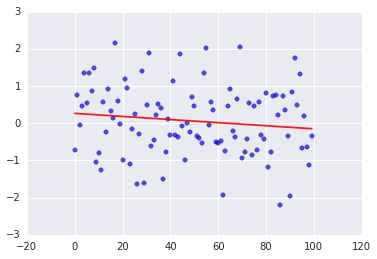

In [84]:
plt.scatter(xs,rand,alpha=0.7)
Y_hat=a+xs*b
plt.plot(xs,Y_hat,'r',alpha=0.9)

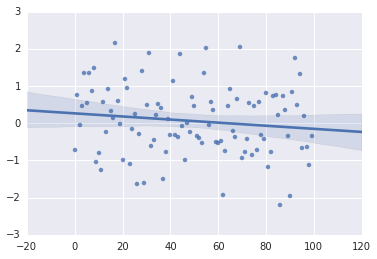

In [85]:
import seaborn
seaborn.regplot(xs,rand)

## Arbitrage Pricing Theory